In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('movie_dataset.csv')
df.head()

,id,title,release_date,genres,original_language,overview,popularity,vote_count,vote_average
0,278,The Shawshank Redemption,1994-09-23,"Drama, Crime",en,Framed in the 1940s for the double murder of h...,124.582,26066,8.703
1,238,The Godfather,1972-03-14,"Drama, Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",199.537,19757,8.695
2,240,The Godfather Part II,1974-12-20,"Drama, Crime",en,In the continuing saga of the Corleone crime f...,129.056,11936,8.577
3,424,Schindler's List,1993-12-15,"Drama, History, War",en,The true story of how businessman Oskar Schind...,108.254,15341,8.567
4,389,12 Angry Men,1957-04-10,Drama,en,The defense and the prosecution have rested an...,69.908,8212,8.500


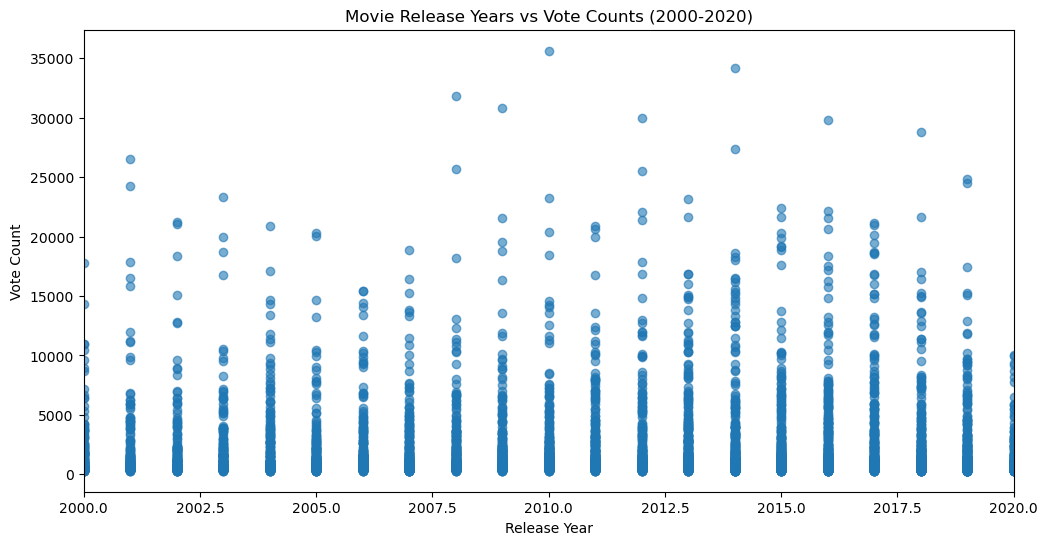

In [51]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

#Problem 1: Setting Axis Ranges

filtered_data = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2020)]

plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['release_year'], filtered_data['vote_count'], alpha=0.6)
plt.xlim(2000, 2020)
plt.xlabel('Release Year')
plt.ylabel('Vote Count')
plt.title('Movie Release Years vs Vote Counts (2000-2020)')
plt.show()

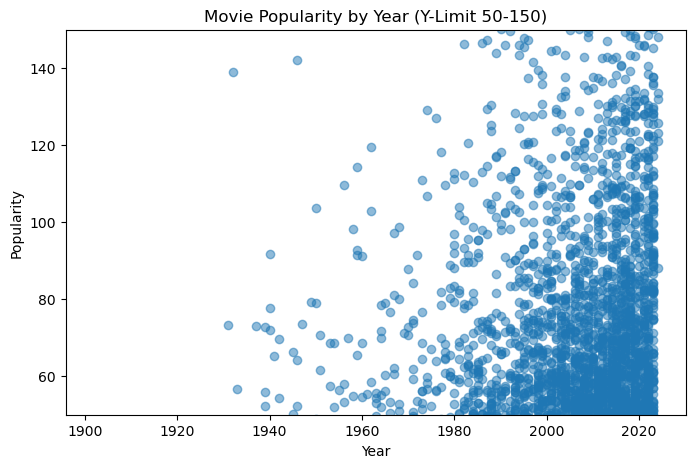

In [53]:
#Problem 2: Setting the Y-Limit

plt.figure(figsize=(8,5))
plt.scatter(df['release_year'], df['popularity'], alpha=0.5)
plt.ylim(50, 150)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Movie Popularity by Year (Y-Limit 50-150)')
plt.show()

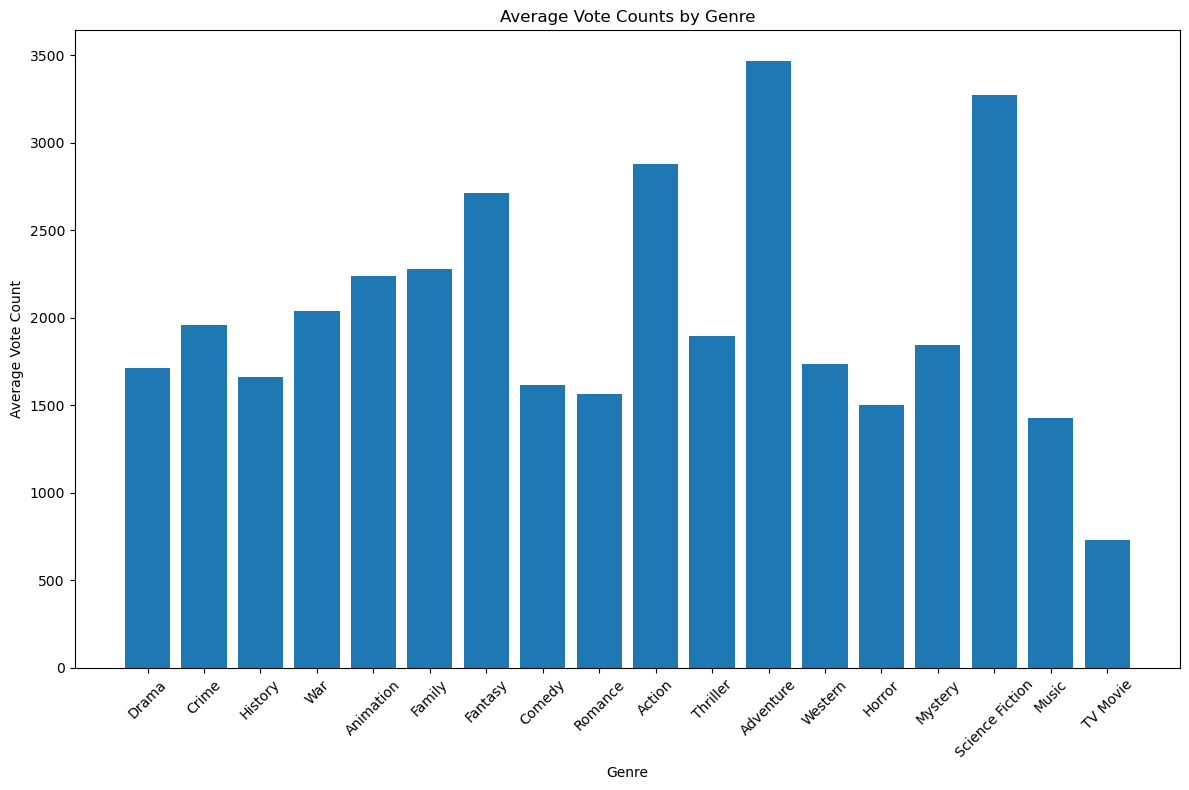

In [55]:
#Problem 3: Using tight_layout()

genre_votes = {}
for _, row in df.iterrows():
    if pd.notna(row['genres']):
        genres = [g.strip() for g in row['genres'].split(',')]
        for genre in genres:
            if genre not in genre_votes:
                genre_votes[genre] = []
            genre_votes[genre].append(row['vote_count'])

# Calculate average votes per genre
avg_votes = {genre: np.mean(votes) for genre, votes in genre_votes.items()}

plt.figure(figsize=(12, 8))
plt.bar(avg_votes.keys(), avg_votes.values())
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Vote Count')
plt.title('Average Vote Counts by Genre')
plt.tight_layout()  # Ensures minimal white space
plt.show()

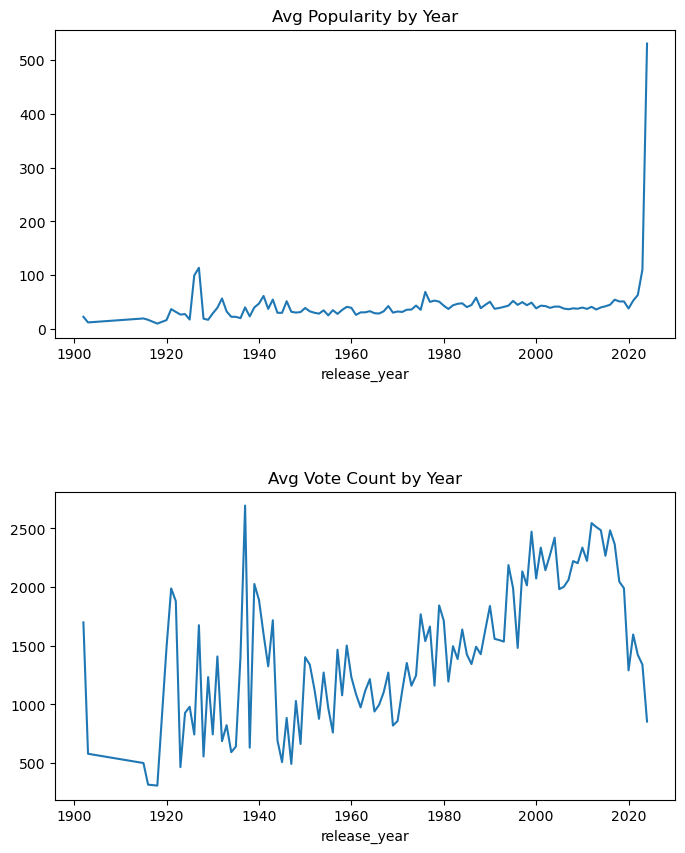

In [57]:
#Problem 4: Adjusting Subplot Layouts

fig, axes = plt.subplots(2, 1, figsize=(8,10))
df.groupby('release_year')['popularity'].mean().plot(ax=axes[0], title='Avg Popularity by Year')
df.groupby('release_year')['vote_count'].mean().plot(ax=axes[1], title='Avg Vote Count by Year')
plt.subplots_adjust(hspace=0.5)
plt.show()

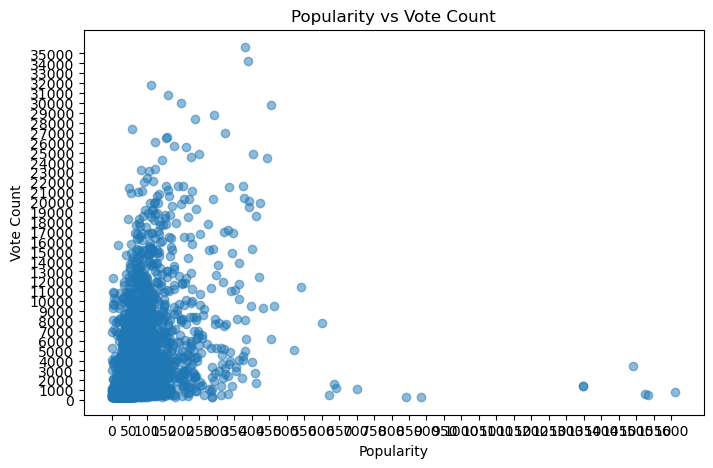

In [61]:
#Problem 5: Setting Tick Frequency on Figure-Level

plt.figure(figsize=(8,5))
plt.scatter(df['popularity'], df['vote_count'], alpha=0.5)
plt.xticks(np.arange(0, max(df['popularity']), 50))
plt.yticks(np.arange(0, max(df['vote_count']), 1000))
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.title('Popularity vs Vote Count')
plt.show()

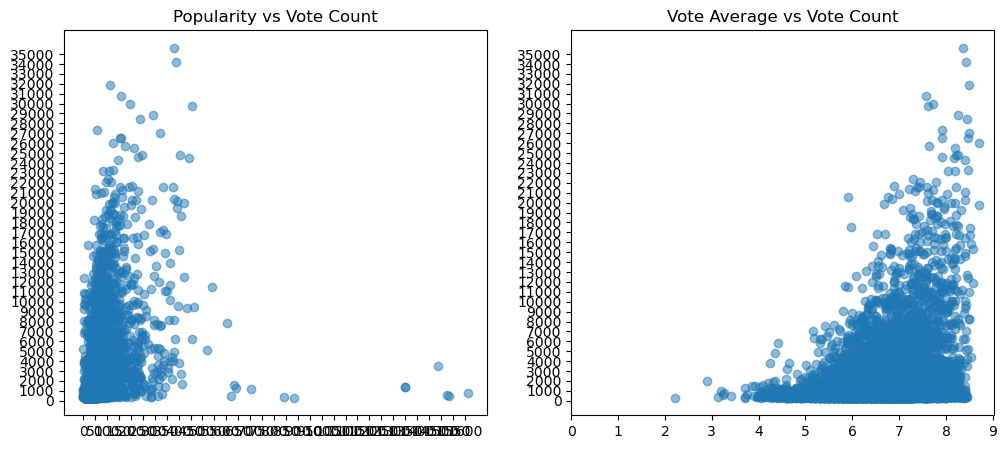

In [63]:
#Problem 6: Setting Tick Frequency on Axis-Level

fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].scatter(df['popularity'], df['vote_count'], alpha=0.5)
axes[0].set_xticks(np.arange(0, max(df['popularity']), 50))
axes[0].set_yticks(np.arange(0, max(df['vote_count']), 1000))
axes[0].set_title('Popularity vs Vote Count')

axes[1].scatter(df['vote_average'], df['vote_count'], alpha=0.5)
axes[1].set_xticks(np.arange(0, 10, 1))
axes[1].set_yticks(np.arange(0, max(df['vote_count']), 1000))
axes[1].set_title('Vote Average vs Vote Count')
plt.show()

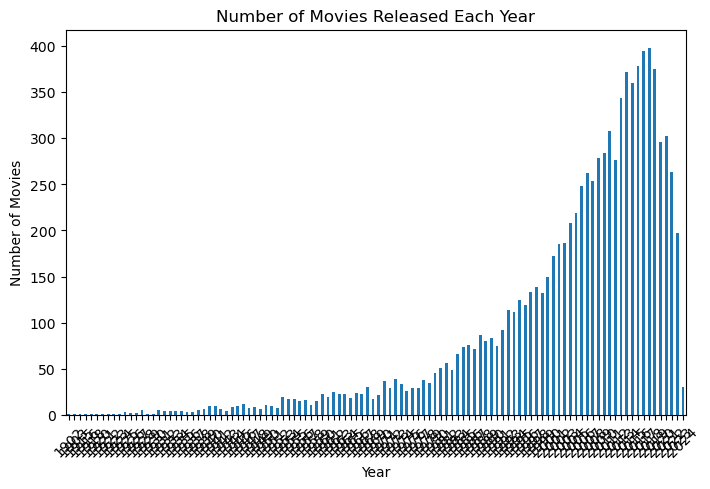

In [65]:
#Problem 7: Rotating X-Axis Tick Labels

plt.figure(figsize=(8,5))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

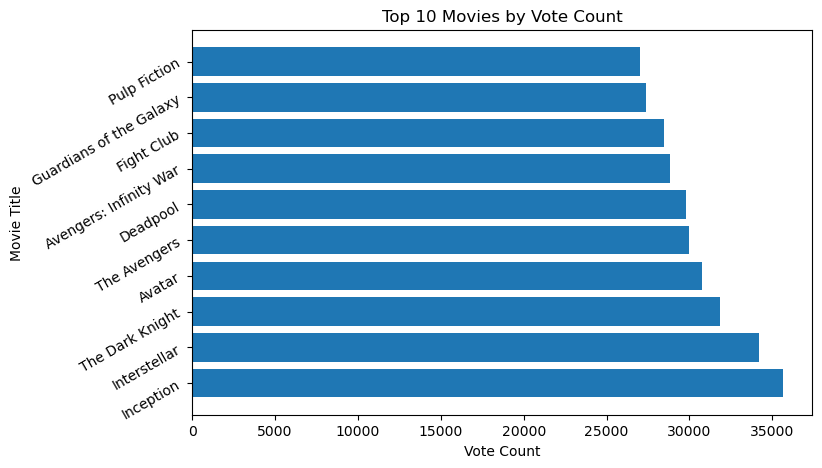

In [67]:
#Problem 8: Rotating Y-Axis Tick Labels

plt.figure(figsize=(8,5))
top_movies = df.nlargest(10, 'vote_count')
plt.barh(top_movies['title'], top_movies['vote_count'])
plt.yticks(rotation=30)
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Vote Count')
plt.show()

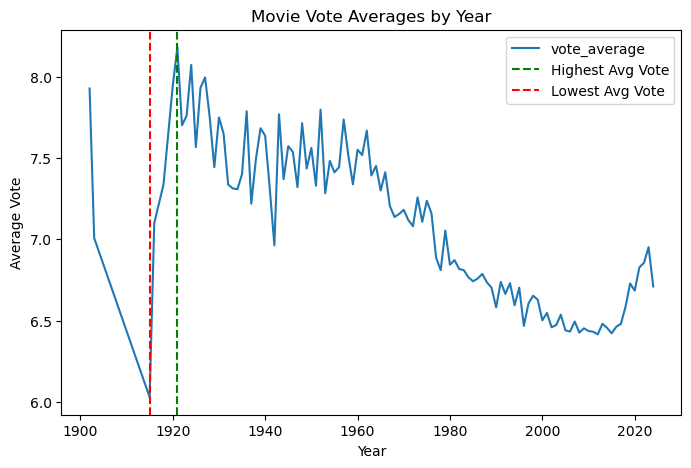

In [69]:
#Problem 9: Drawing Vertical Lines

plt.figure(figsize=(8,5))
df.groupby('release_year')['vote_average'].mean().plot()
plt.axvline(df.groupby('release_year')['vote_average'].mean().idxmax(), color='g', linestyle='--', label='Highest Avg Vote')
plt.axvline(df.groupby('release_year')['vote_average'].mean().idxmin(), color='r', linestyle='--', label='Lowest Avg Vote')
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.title('Movie Vote Averages by Year')
plt.legend()
plt.show()

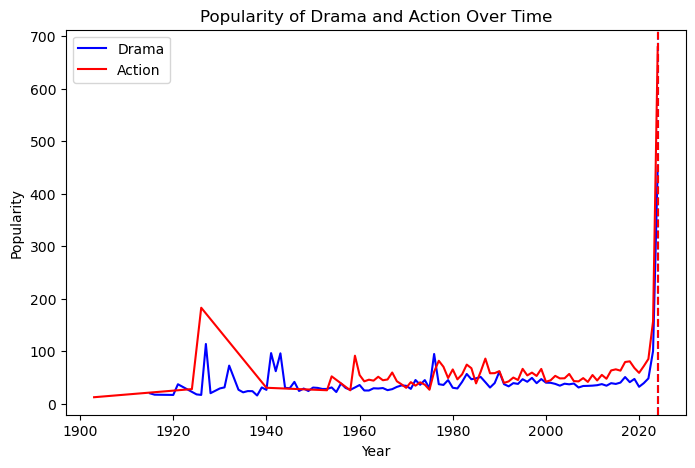

In [71]:
#Problem 10: Changing Colors of Plot Elements

plt.figure(figsize=(8,5))
drama = df[df['genres'].str.contains('Drama', na=False)].groupby('release_year')['popularity'].mean()
action = df[df['genres'].str.contains('Action', na=False)].groupby('release_year')['popularity'].mean()
plt.plot(drama, label='Drama', color='blue')
plt.plot(action, label='Action', color='red')
plt.axvline(drama.idxmax(), color='blue', linestyle='--')
plt.axvline(action.idxmax(), color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Popularity of Drama and Action Over Time')
plt.legend()
plt.show()

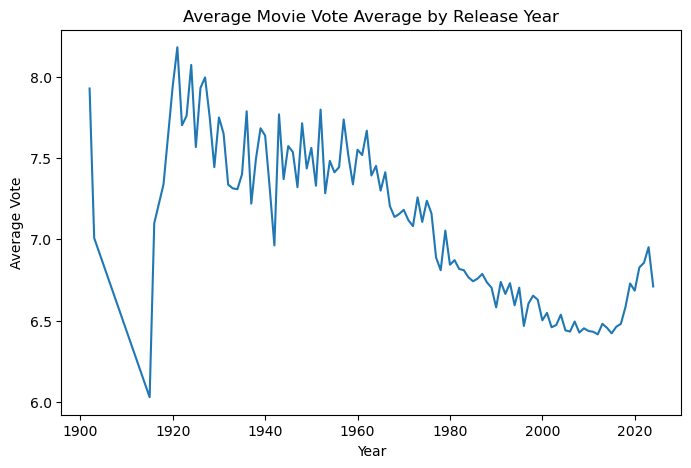

In [73]:
#Problem 11: Plotting a Line Plot

plt.figure(figsize=(8,5))
df.groupby('release_year')['vote_average'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.title('Average Movie Vote Average by Release Year')
plt.show()

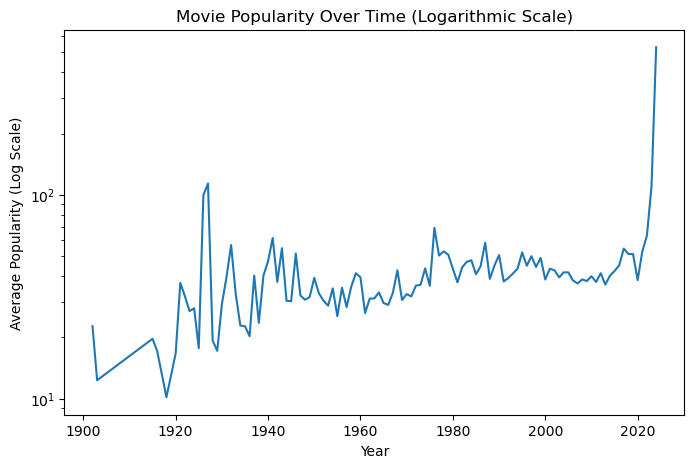

In [75]:
#Problem 12: Plotting a Line Plot Logarithmically

plt.figure(figsize=(8,5))
df.groupby('release_year')['popularity'].mean().plot()
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Average Popularity (Log Scale)')
plt.title('Movie Popularity Over Time (Logarithmic Scale)')
plt.show()

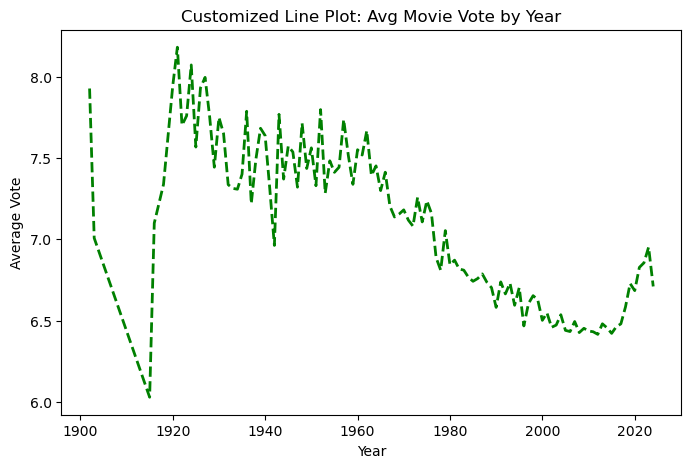

In [77]:
#Problem 13: Customizing Line Plots

plt.figure(figsize=(8,5))
df.groupby('release_year')['vote_average'].mean().plot(linestyle='--', color='green', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.title('Customized Line Plot: Avg Movie Vote by Year')
plt.show()

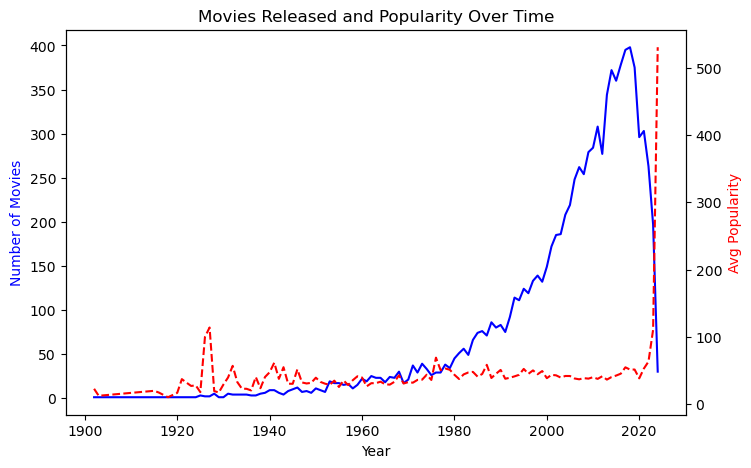

In [79]:
#Problem 14: Plotting Multiple Line Plots with Different Scales

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
movies_per_year = df['release_year'].value_counts().sort_index()
popularity_per_year = df.groupby('release_year')['popularity'].mean()

ax1.plot(movies_per_year, color='blue', label='Movies Released')
ax2.plot(popularity_per_year, color='red', linestyle='--', label='Avg Popularity')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color='blue')
ax2.set_ylabel('Avg Popularity', color='red')
plt.title('Movies Released and Popularity Over Time')
plt.show()

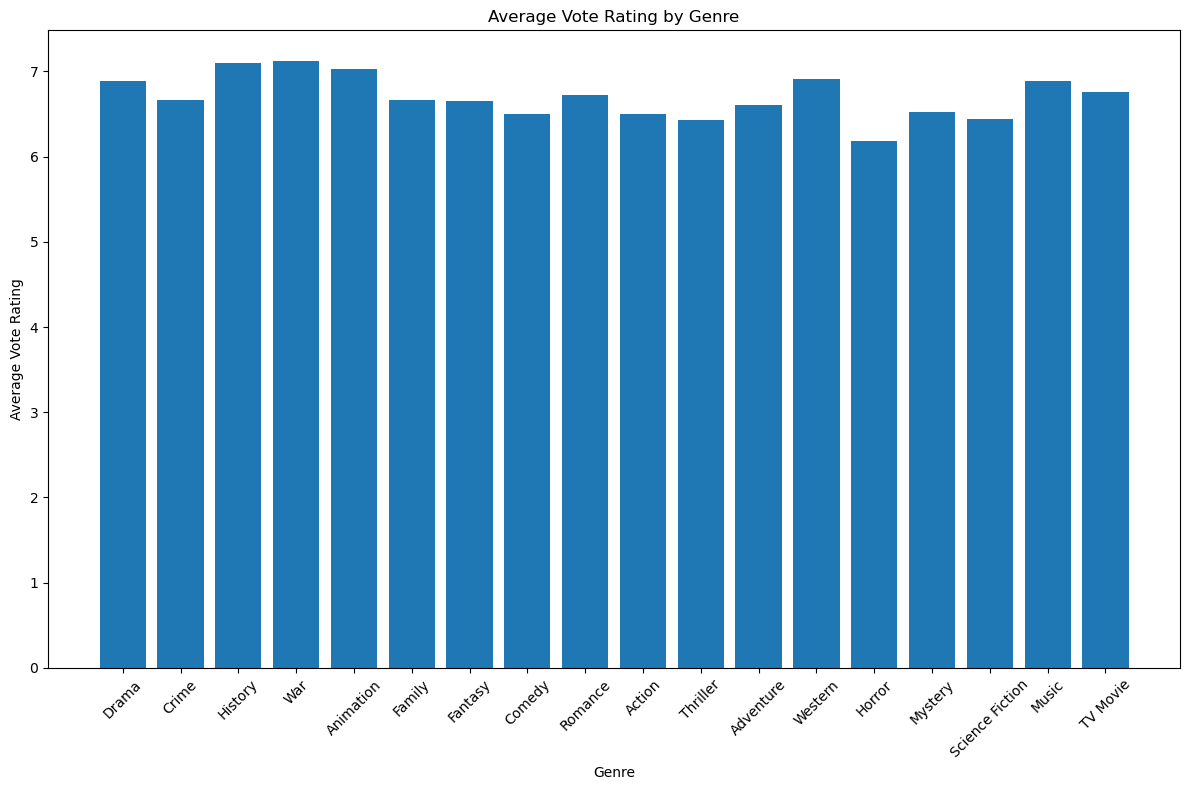

In [81]:
#Problem 15: Plotting a Bar Plot

genre_ratings = {}
for _, row in df.iterrows():
    if pd.notna(row['genres']):
        genres = [g.strip() for g in row['genres'].split(',')]
        for genre in genres:
            if genre not in genre_ratings:
                genre_ratings[genre] = []
            genre_ratings[genre].append(row['vote_average'])

avg_ratings = {genre: np.mean(ratings) for genre, ratings in genre_ratings.items()}

plt.figure(figsize=(12, 8))
plt.bar(avg_ratings.keys(), avg_ratings.values())
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Vote Rating')
plt.title('Average Vote Rating by Genre')
plt.tight_layout()
plt.show()

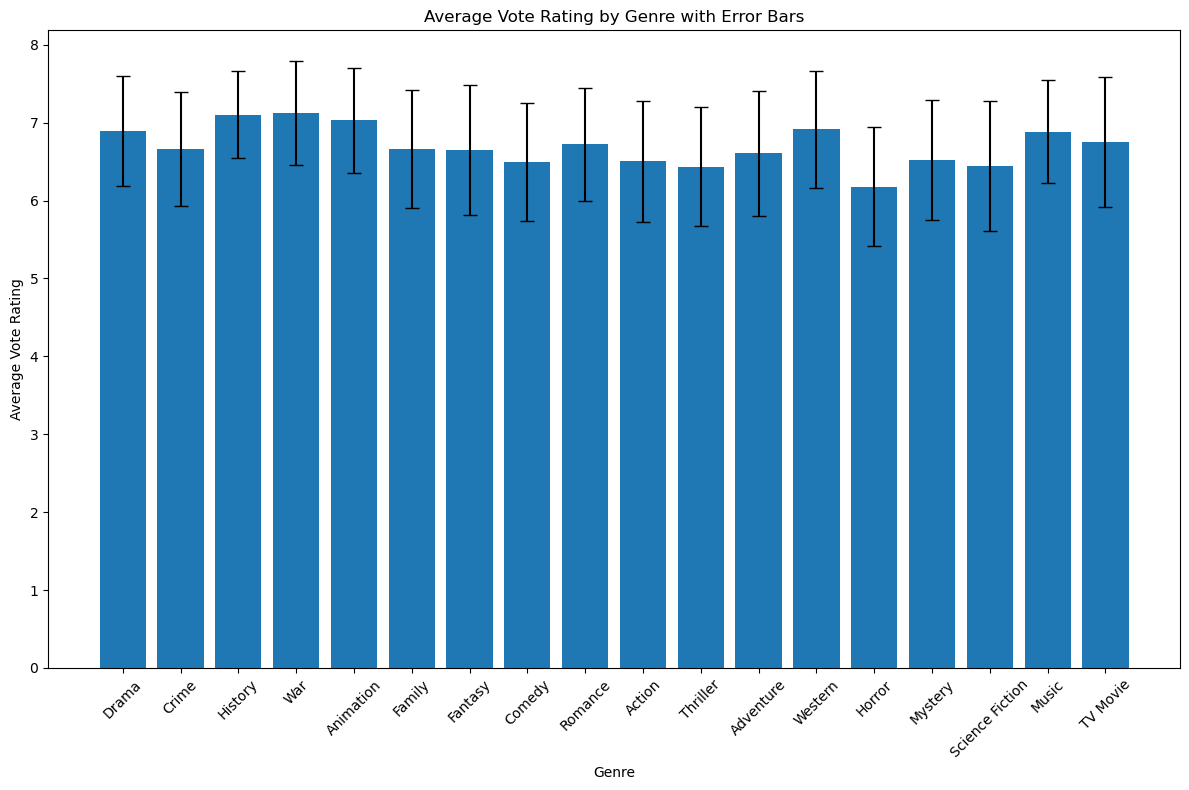

In [83]:
#Problem 16: Bar Plot with Error Bars in Matplotlib

genre_stds = {genre: np.std(ratings) for genre, ratings in genre_ratings.items()}

plt.figure(figsize=(12, 8))
plt.bar(avg_ratings.keys(), avg_ratings.values(), 
         yerr=[genre_stds[genre] for genre in avg_ratings.keys()], 
         capsize=5)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Vote Rating')
plt.title('Average Vote Rating by Genre with Error Bars')
plt.tight_layout()
plt.show()

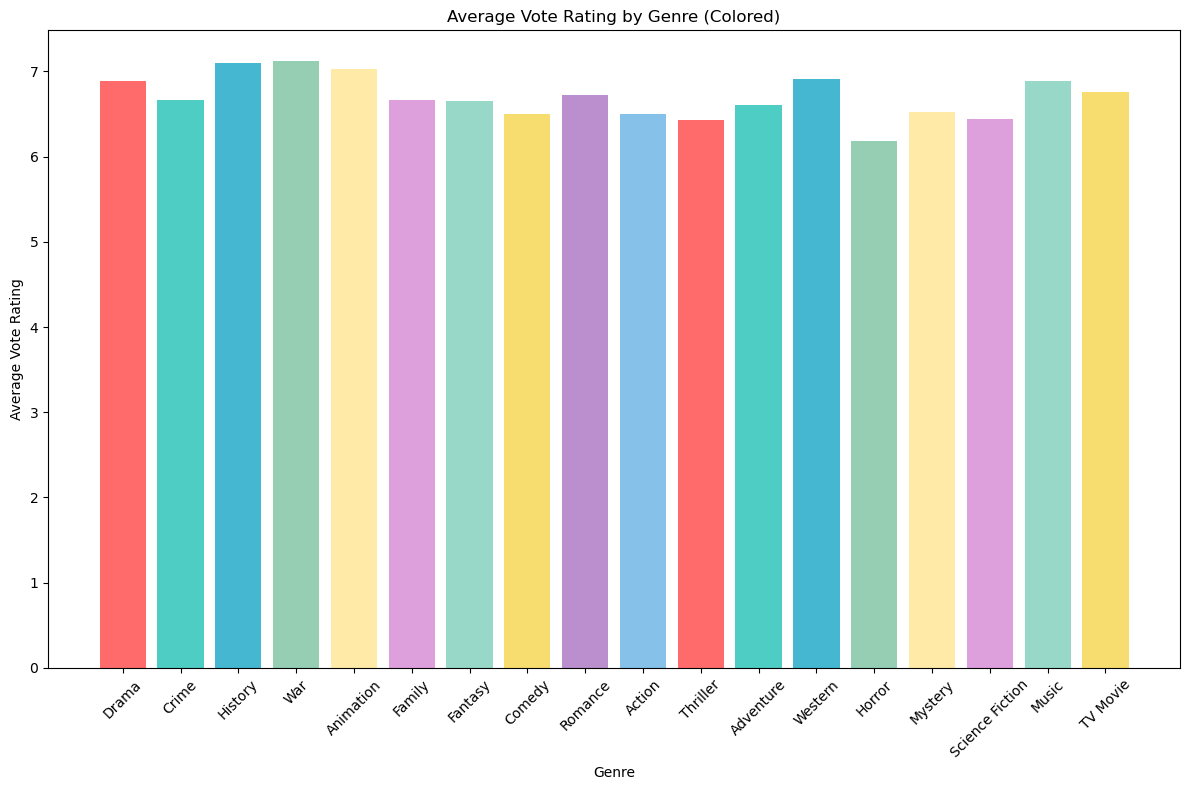

In [85]:
#Problem 17: Changing Bar Plot Colors

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
          '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

plt.figure(figsize=(12, 8))
bars = plt.bar(avg_ratings.keys(), avg_ratings.values(), 
               color=colors[:len(avg_ratings)])
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Vote Rating')
plt.title('Average Vote Rating by Genre (Colored)')
plt.tight_layout()
plt.show()

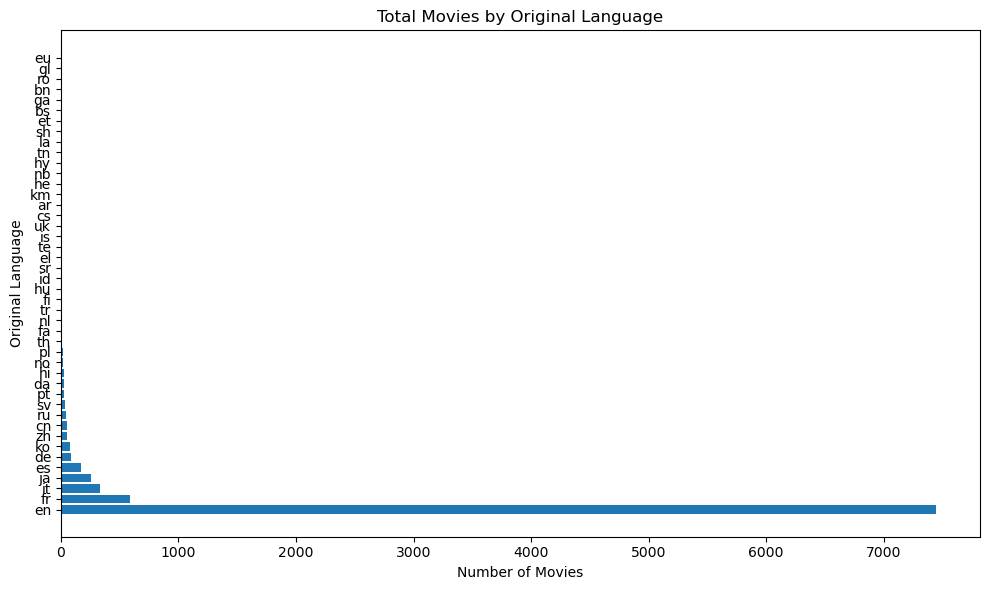

In [87]:
#Problem 18: Plotting Horizontal Bar Plots

language_counts = df['original_language'].value_counts()
plt.figure(figsize=(10, 6))
plt.barh(language_counts.index, language_counts.values)
plt.xlabel('Number of Movies')
plt.ylabel('Original Language')
plt.title('Total Movies by Original Language')
plt.tight_layout()
plt.show()

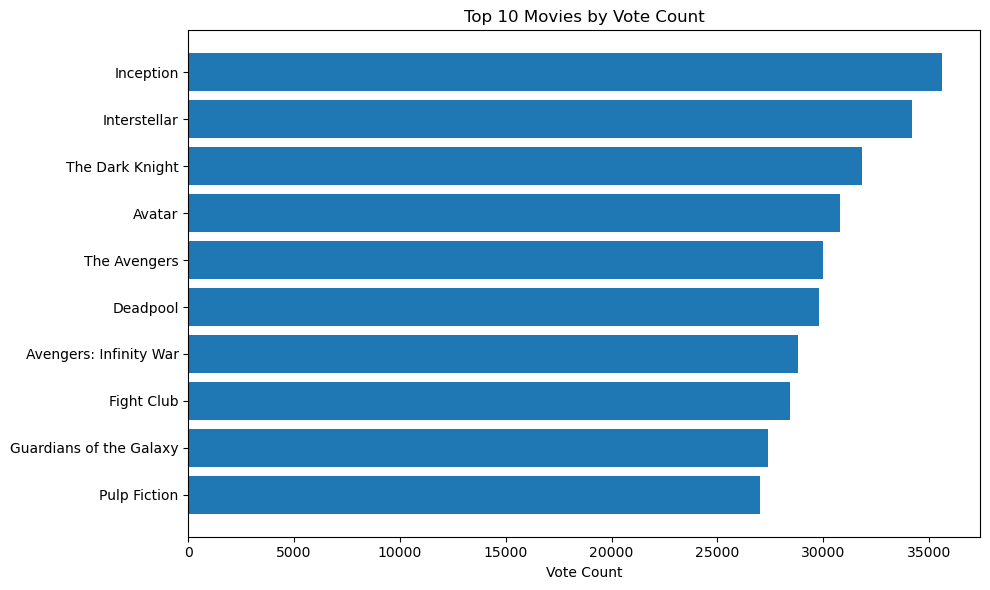

In [89]:
#Problem 19: Sorting Bar Order

top10_votes = df.nlargest(10, 'vote_count').sort_values('vote_count', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(top10_votes['title'], top10_votes['vote_count'])
plt.xlabel('Vote Count')
plt.title('Top 10 Movies by Vote Count')
plt.tight_layout()
plt.show()

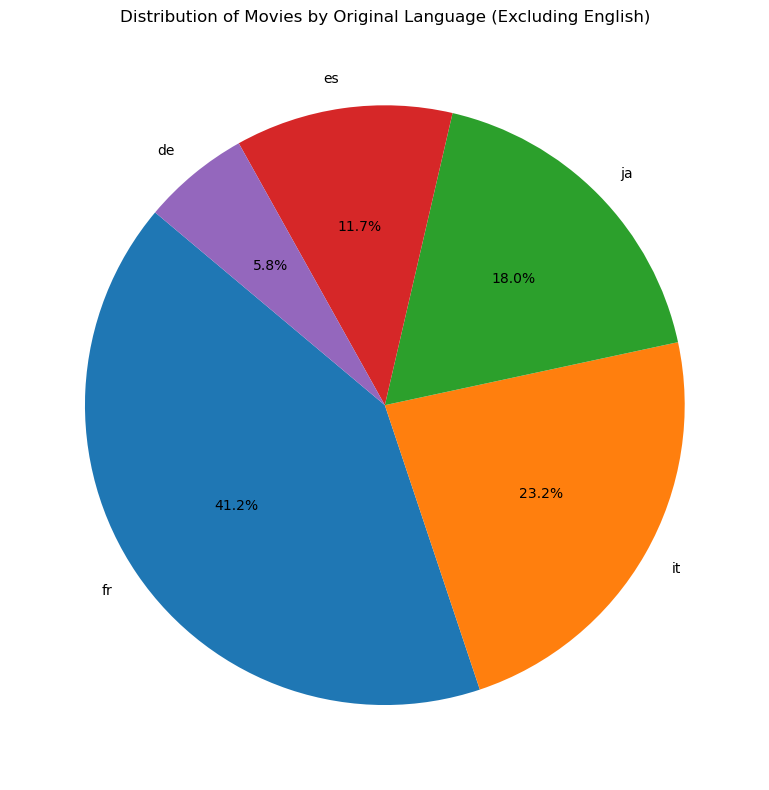

In [91]:
#Problem 20: Plotting a Pie Chart

non_english_languages = language_counts.drop('en', errors='ignore').nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(non_english_languages, labels=non_english_languages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Original Language (Excluding English)')
plt.tight_layout()
plt.show()